In [34]:
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
import random

In [26]:
# set base directories
train_dir = os.path.join("..", "data", "raw", "train")
test_dir = os.path.join("..", "data", "raw", "test")

In [27]:
# set paths for csv files
train_csv_path = os.path.join(train_dir, "Label_EyeQ_train.csv")
test_csv_path = os.path.join(test_dir, "Label_EyeQ_test.csv")

# load csv files directly
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

In [28]:
print(f"loaded train data: shape {train_df.shape}")
print(f"loaded test data: shape {test_df.shape}")

loaded train data: shape (12543, 4)
loaded test data: shape (16249, 4)


In [10]:
# display first few rows of each dataframe
print("\n--- First 5 rows of train data ---")
display(train_df.head())

print("\n--- First 5 rows of test data ---")
display(test_df.head())


--- First 5 rows of train data ---


Unnamed: 0             image  quality  DR_grade
0           0   10009_left.jpeg        0         0
1           1  10009_right.jpeg        0         0
2           2   10014_left.jpeg        2         0
3           3  10014_right.jpeg        2         0
4           4   10015_left.jpeg        0         0


--- First 5 rows of test data ---


Unnamed: 0             image  quality  DR_grade
0           0      1_right.jpeg        1         0
1           1  10001_right.jpeg        0         2
2           2  10004_right.jpeg        0         0
3           3   10008_left.jpeg        0         0
4           4  10016_right.jpeg        0         2

In [11]:
# check for missing values
train_missing = train_df.isnull().sum().sum()
test_missing = test_df.isnull().sum().sum()
print(f"missing values in train data: {train_missing}")
print(f"missing values in test data: {test_missing}")

missing values in train data: 0
missing values in test data: 0



DR_grade distribution in train data:
DR_grade
0    9239
1     911
2    1809
3     333
4     251
Name: count, dtype: int64

DR_grade percentages in train data:
Grade 0: 73.66%
Grade 1: 7.26%
Grade 2: 14.42%
Grade 3: 2.65%
Grade 4: 2.00%


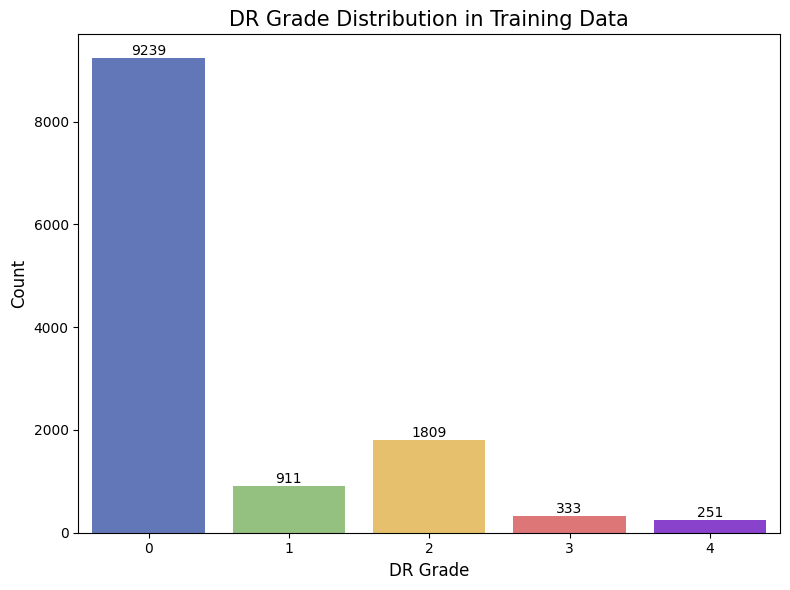

In [17]:
# analyze DR_grade distribution in training data
print("\nDR_grade distribution in train data:")
train_grade_counts = train_df['DR_grade'].value_counts().sort_index()
print(train_grade_counts)

# calculate percentages
train_grade_percentages = train_df['DR_grade'].value_counts(normalize=True).sort_index() * 100
print("\nDR_grade percentages in train data:")
for grade, percentage in train_grade_percentages.items():
    print(f"Grade {grade}: {percentage:.2f}%")

# visualize DR_grade distribution with different colors for each bar
plt.figure(figsize=(8, 6))
colors = ['#5470C6', '#91CC75', '#FAC858', '#EE6666', '#8A2BE2']  # custom color palette
ax = sns.countplot(x='DR_grade', data=train_df, hue='DR_grade', palette=colors, legend=False)
plt.title('DR Grade Distribution in Training Data', fontsize=15)
plt.xlabel('DR Grade', fontsize=12)
plt.ylabel('Count', fontsize=12)

# add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 50,  # offset for visibility
            f'{int(height)}',
            ha="center") 

plt.tight_layout()
plt.show()


DR_grade distribution in test data:
DR_grade
0    11362
1     1398
2     2644
3      448
4      397
Name: count, dtype: int64

DR_grade percentages in test data:
Grade 0: 69.92%
Grade 1: 8.60%
Grade 2: 16.27%
Grade 3: 2.76%
Grade 4: 2.44%


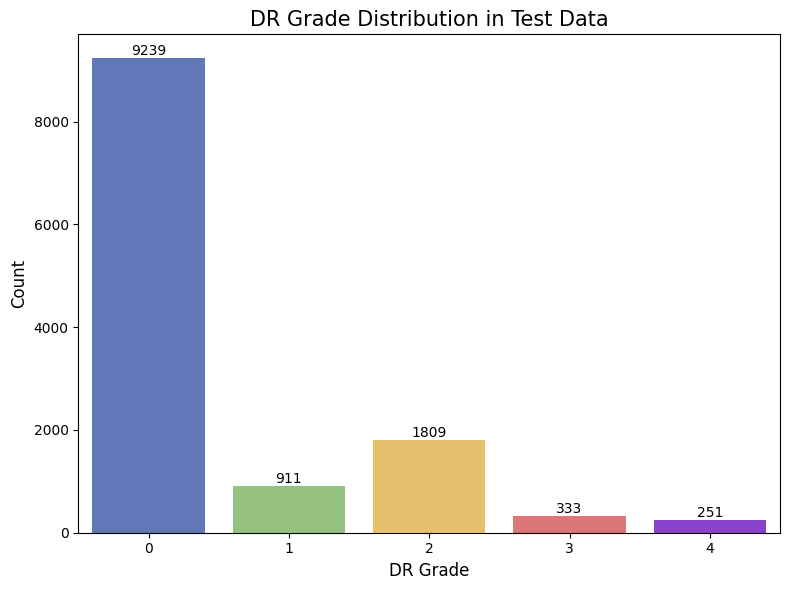

In [21]:
# analyze DR_grade distribution in test data
print("\nDR_grade distribution in test data:")
test_grade_counts = test_df['DR_grade'].value_counts().sort_index()
print(test_grade_counts)

# calculate percentages
test_grade_percentages = test_df['DR_grade'].value_counts(normalize=True).sort_index() * 100
print("\nDR_grade percentages in test data:")
for grade, percentage in test_grade_percentages.items():
    print(f"Grade {grade}: {percentage:.2f}%")

# visualize DR_grade distribution with different colors for each bar
plt.figure(figsize=(8, 6))
colors = ['#5470C6', '#91CC75', '#FAC858', '#EE6666', '#8A2BE2']  # matching colors from training plot
ax = sns.countplot(x='DR_grade', data=train_df, hue='DR_grade', palette=colors, legend=False)
plt.title('DR Grade Distribution in Test Data', fontsize=15)
plt.xlabel('DR Grade', fontsize=12)
plt.ylabel('Count', fontsize=12)

# add count labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 50,  # offset for visibility
            f'{int(height)}',
            ha="center") 

plt.tight_layout()
plt.show()


Comparison between train and test distributions:
            Train %     Test %
DR_grade                      
0         73.658614  69.924303
1          7.263015   8.603606
2         14.422387  16.271771
3          2.654867   2.757093
4          2.001116   2.443227


<Figure size 1000x600 with 0 Axes>

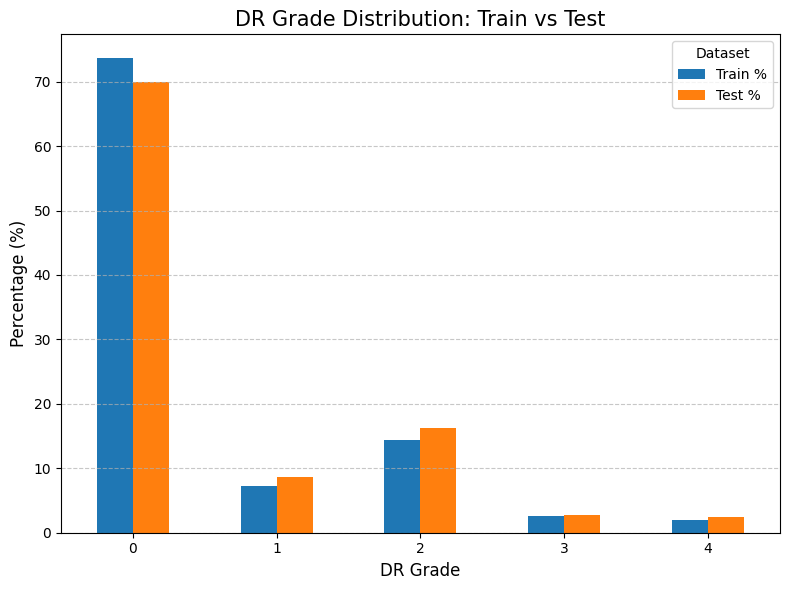

In [25]:
# comparison between train and test distributions
print("\nComparison between train and test distributions:")
comparison_df = pd.DataFrame({
    'Train %': train_grade_percentages,
    'Test %': test_grade_percentages
})
print(comparison_df)

# visualization of the comparison
plt.figure(figsize=(10, 6))
comparison_df.plot(kind='bar', figsize=(8, 6))
plt.title('DR Grade Distribution: Train vs Test', fontsize=15)
plt.xlabel('DR Grade', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

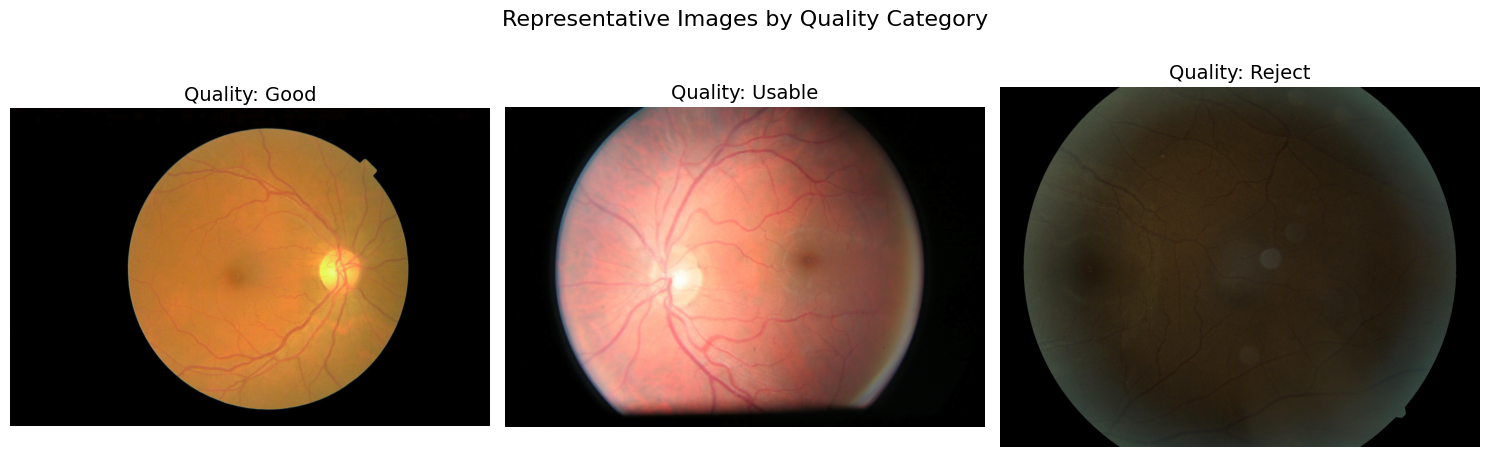

good quality image: 18481_right.jpeg, dimensions: (1184, 1792, 3)
usable quality image: 11155_right.jpeg, dimensions: (2336, 3504, 3)
reject quality image: 30818_left.jpeg, dimensions: (1920, 2560, 3)


In [ ]:
# set up quality mapping
quality_mapping = {0: 'Good', 1: 'Usable', 2: 'Reject'}

# set random seed for reproducibility
random.seed(42)

# select one image from each quality category
good_images = train_df[train_df['quality'] == 0]['image'].values
usable_images = train_df[train_df['quality'] == 1]['image'].values
reject_images = train_df[train_df['quality'] == 2]['image'].values

# randomly select one image from each category
good_image_name = random.choice(good_images)
usable_image_name = random.choice(usable_images)
reject_image_name = random.choice(reject_images)

# load the selected images using cv2
good_image_path = os.path.join(train_dir, good_image_name)
usable_image_path = os.path.join(train_dir, usable_image_name)
reject_image_path = os.path.join(train_dir, reject_image_name)

good_image = cv2.imread(good_image_path)
usable_image = cv2.imread(usable_image_path)
reject_image = cv2.imread(reject_image_path)

# convert BGR to RGB for proper display in matplotlib
good_image = cv2.cvtColor(good_image, cv2.COLOR_BGR2RGB)
usable_image = cv2.cvtColor(usable_image, cv2.COLOR_BGR2RGB)
reject_image = cv2.cvtColor(reject_image, cv2.COLOR_BGR2RGB)

# create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# display images
axes[0].imshow(good_image)
axes[0].set_title(f"Quality: Good", fontsize=14)
axes[0].axis('off')

axes[1].imshow(usable_image)
axes[1].set_title(f"Quality: Usable", fontsize=14)
axes[1].axis('off')

axes[2].imshow(reject_image)
axes[2].set_title(f"Quality: Reject", fontsize=14)
axes[2].axis('off')

plt.suptitle('Representative Images by Quality Category', fontsize=16)
plt.tight_layout()
plt.show()

# print the image names and dimensions for reference
print(f"good quality image: {good_image_name}, dimensions: {good_image.shape}")
print(f"usable quality image: {usable_image_name}, dimensions: {usable_image.shape}")
print(f"reject quality image: {reject_image_name}, dimensions: {reject_image.shape}")

# store these variables for downstream use
selected_images = {
    'good': {'name': good_image_name, 'path': good_image_path, 'image': good_image},
    'usable': {'name': usable_image_name, 'path': usable_image_path, 'image': usable_image},
    'reject': {'name': reject_image_name, 'path': reject_image_path, 'image': reject_image}
}

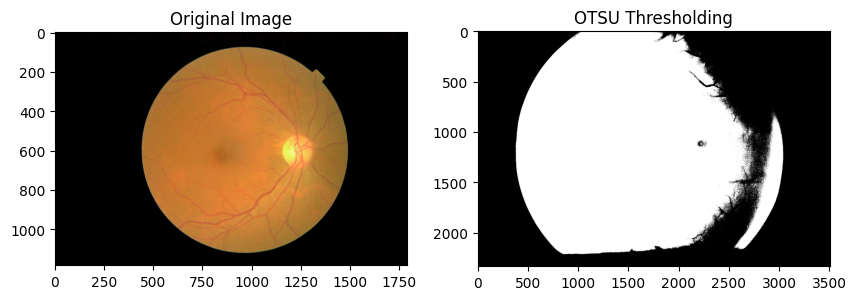

In [62]:
# Convert the RGB image to grayscale first (OTSU works on grayscale images)
gray_image = cv2.cvtColor(usable_image, cv2.COLOR_RGB2GRAY)

# Apply OTSU thresholding
# This will automatically determine the optimal threshold value
_, threshold_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(good_image), plt.title('Original Image')
plt.subplot(122), plt.imshow(threshold_image, cmap='gray'), plt.title('OTSU Thresholding')
plt.show()

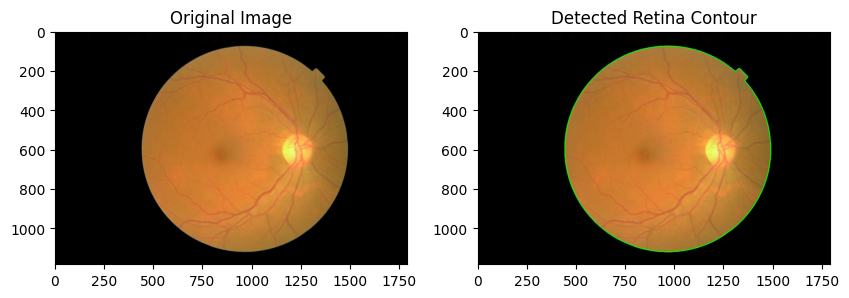

In [56]:
# First create a kernel for morphological operations
kernel = np.ones((5,5), np.uint8)

# Apply closing operation to fill small holes in the foreground
mask = cv2.morphologyEx(threshold_image, cv2.MORPH_CLOSE, kernel)

# Find contours in the mask to identify the retina region
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get the largest contour (which should be the retina)
largest_contour = max(contours, key=cv2.contourArea)

# Create a visualization to show the detected contour
contour_visualization = good_image.copy()
cv2.drawContours(contour_visualization, [largest_contour], -1, (0, 255, 0), 3)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(good_image), plt.title('Original Image')
plt.subplot(122), plt.imshow(contour_visualization), plt.title('Detected Retina Contour')
plt.show()

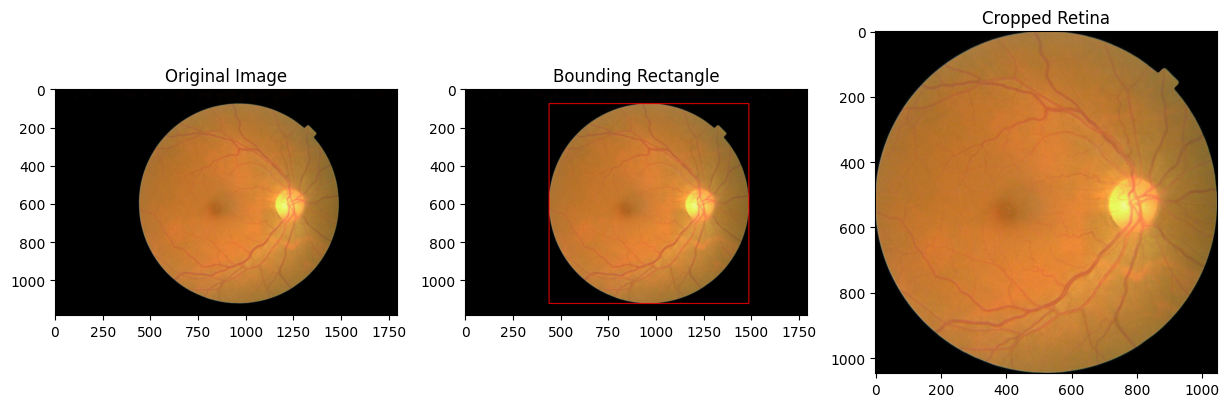

In [59]:
# Create a bounding rectangle around the retina
x, y, w, h = cv2.boundingRect(largest_contour)

# Draw the rectangle on the image for visualization
rectangle_visualization = good_image.copy()
cv2.rectangle(rectangle_visualization, (x, y), (x+w, y+h), (255, 0, 0), 3)

# Crop the image to include just the retina
cropped_retina = good_image[y:y+h, x:x+w]

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(good_image), plt.title('Original Image')
plt.subplot(132), plt.imshow(rectangle_visualization), plt.title('Bounding Rectangle')
plt.subplot(133), plt.imshow(cropped_retina), plt.title('Cropped Retina')
plt.show()

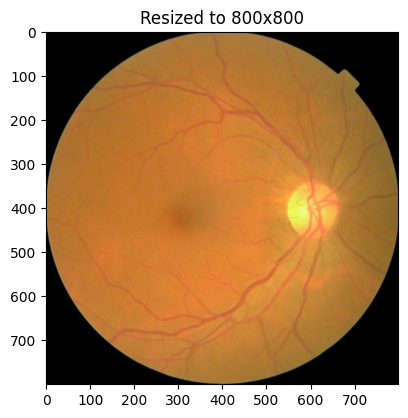

In [61]:
# Resize to 800x800
retina_800 = cv2.resize(cropped_retina, (800, 800))

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(122), plt.imshow(retina_800), plt.title('Resized to 800x800')
plt.show()

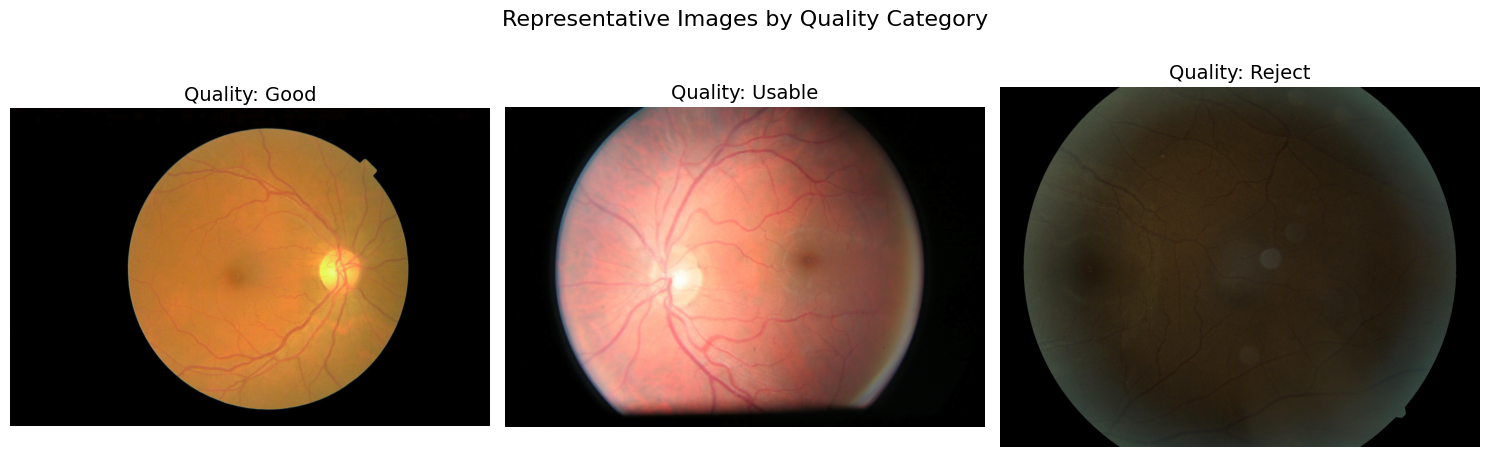

good quality image: 18481_right.jpeg, dimensions: (1184, 1792, 3)
usable quality image: 11155_right.jpeg, dimensions: (2336, 3504, 3)
reject quality image: 30818_left.jpeg, dimensions: (1920, 2560, 3)


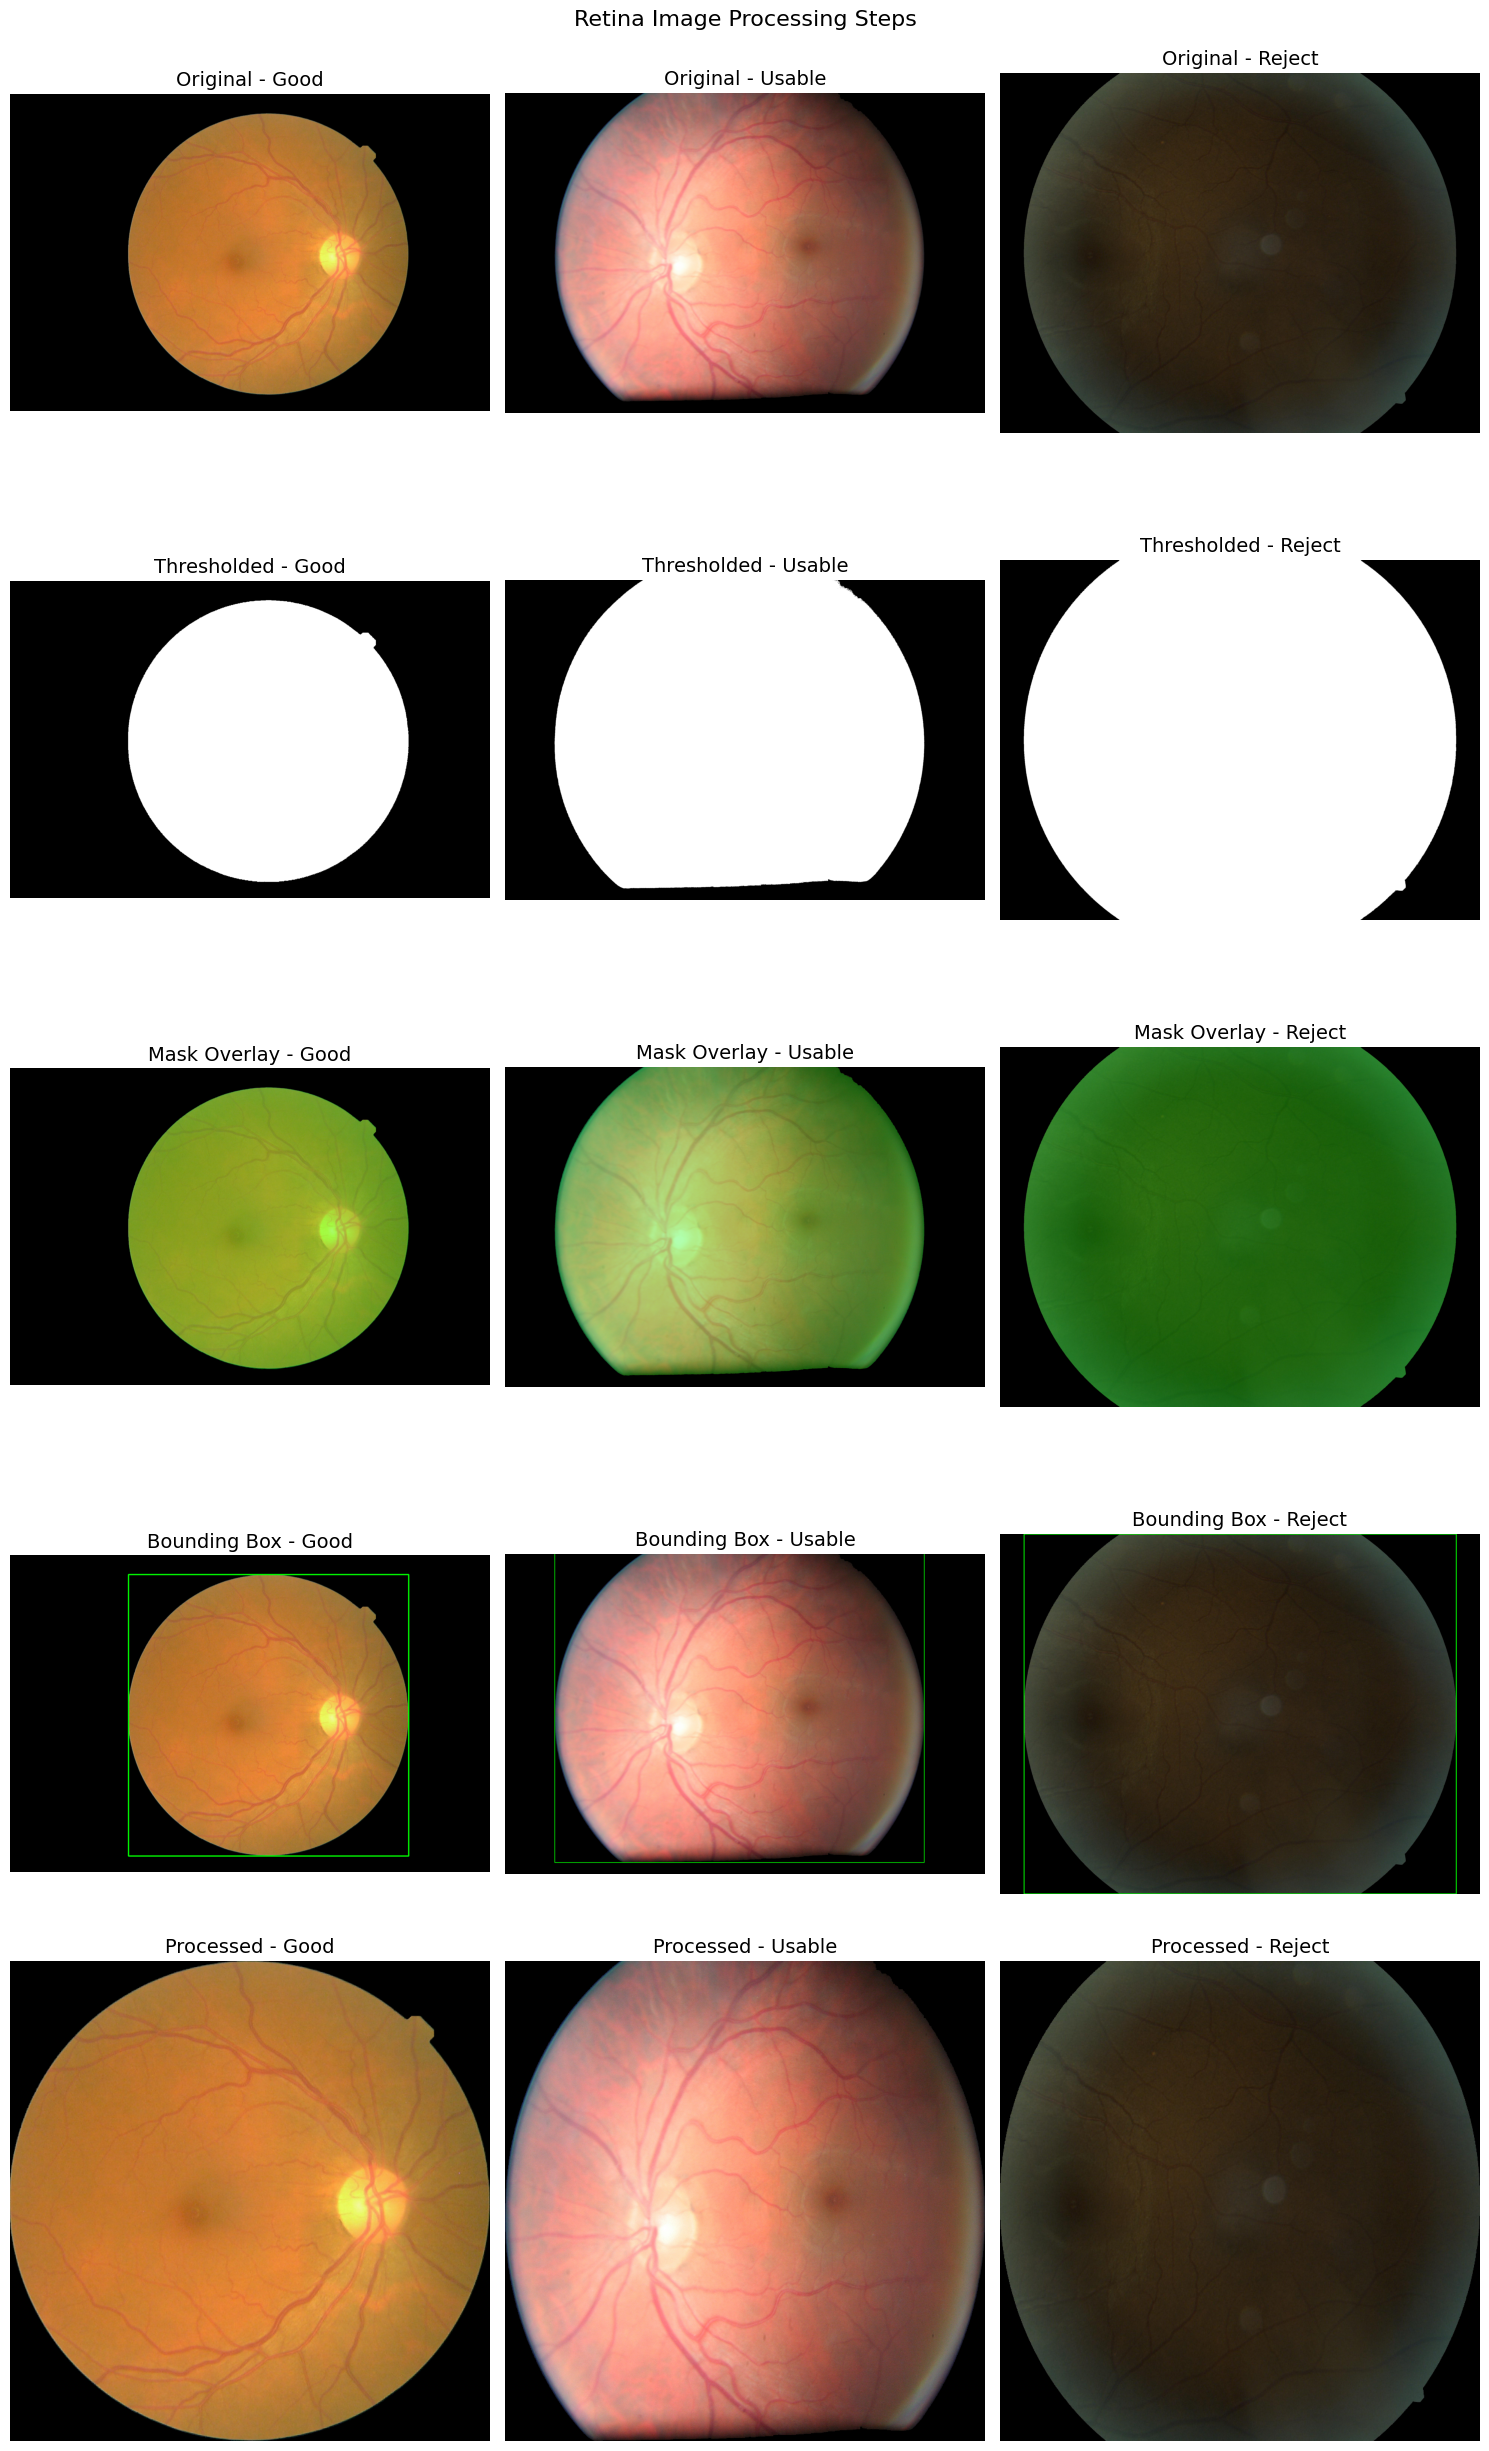

good quality image: 18481_right.jpeg, original dimensions: (1184, 1792, 3), processed dimensions: (800, 800, 3)
usable quality image: 11155_right.jpeg, original dimensions: (2336, 3504, 3), processed dimensions: (800, 800, 3)
reject quality image: 30818_left.jpeg, original dimensions: (1920, 2560, 3), processed dimensions: (800, 800, 3)


In [72]:
def get_mask_BZ(img, visualize=False):
    """Generate a binary mask for the retinal region"""
    # convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # compute threshold based on image mean
    threshold = np.mean(gray_img) / 3 - 5
    
    # apply binary thresholding
    _, mask = cv2.threshold(gray_img, max(0, threshold), 1, cv2.THRESH_BINARY)
    
    # save thresholded image for visualization
    thresholded_img = mask.copy() * 255
    
    # create a buffer mask for flood fill operations
    nn_mask = np.zeros((mask.shape[0] + 2, mask.shape[1] + 2), np.uint8)
    
    # invert mask for background identification
    new_mask = (1 - mask).astype(np.uint8)
    
    # fill background regions using flood fill from corners
    _, new_mask, _, _ = cv2.floodFill(new_mask, nn_mask, (0, 0), (0), cv2.FLOODFILL_MASK_ONLY)
    _, new_mask, _, _ = cv2.floodFill(new_mask, nn_mask, (new_mask.shape[1] - 1, new_mask.shape[0] - 1), (0), cv2.FLOODFILL_MASK_ONLY)
    
    # combine masks to complete segmentation
    mask = mask + new_mask
    
    # create an elliptical structuring element for morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20, 20))
    
    # apply erosion to remove small artifacts
    mask = cv2.erode(mask, kernel)
    
    # apply dilation to restore retinal region
    mask = cv2.dilate(mask, kernel)
    
    if visualize:
        return mask, thresholded_img
    return mask

def remove_black_borders(img, visualize=False):
    """Extract the circular retinal region from fundus images"""
    # generate mask and visualization images if requested
    if visualize:
        mask, thresholded_img = get_mask_BZ(img, visualize=True)
    else:
        mask = get_mask_BZ(img)
    
    # create mask overlay for visualization
    mask_overlay = img.copy()
    # create a semi-transparent green mask
    green_mask = np.zeros_like(img)
    green_mask[mask > 0] = [0, 255, 0]  # green color
    # blend with original image
    mask_overlay = cv2.addWeighted(mask_overlay, 0.7, green_mask, 0.3, 0)
    
    # apply mask to isolate retina and remove background
    masked_img = img.copy()
    masked_img[mask <= 0] = 0
    
    # find the bounding box coordinates of the masked region
    indices = np.where(mask > 0)
    y_min, y_max = indices[0].min(), indices[0].max()
    x_min, x_max = indices[1].min(), indices[1].max()
    
    # create bounded box visualization
    bounded_img = img.copy()
    cv2.rectangle(bounded_img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)
    
    # crop to the bounding box area
    cropped_img = img[y_min:y_max, x_min:x_max, ...]
    
    if visualize:
        return cropped_img, thresholded_img, mask_overlay, bounded_img
    return cropped_img

def preprocess_image(img, visualize=False):
    """Apply preprocessing: remove black borders and resize to 800x800"""
    # remove black borders with visualization if requested
    if visualize:
        img_no_borders, thresholded_img, mask_overlay, bounded_img = remove_black_borders(img, visualize=True)
    else:
        img_no_borders = remove_black_borders(img)
    
    # resize to 800x800 pixels for standardization
    resized_img = cv2.resize(img_no_borders, (800, 800))
    
    if visualize:
        return resized_img, thresholded_img, mask_overlay, bounded_img
    return resized_img

def display_processing_steps(images_dict):
    """Display all processing steps for each image"""
    # define quality mapping for titles
    quality_mapping = ['Good', 'Usable', 'Reject']
    
    # create a figure with multiple rows and columns
    fig, axes = plt.subplots(5, 3, figsize=(15, 25))
    
    # loop through each category and display images
    for i, (key, data) in enumerate(images_dict.items()):
        # display original images
        axes[0, i].imshow(data['original'])
        axes[0, i].set_title(f"Original - {quality_mapping[i]}", fontsize=14)
        axes[0, i].axis('off')
        
        # display thresholded images
        axes[1, i].imshow(data['thresholded'], cmap='gray')
        axes[1, i].set_title(f"Thresholded - {quality_mapping[i]}", fontsize=14)
        axes[1, i].axis('off')
        
        # display mask overlay visualization
        axes[2, i].imshow(data['mask_overlay'])
        axes[2, i].set_title(f"Mask Overlay - {quality_mapping[i]}", fontsize=14)
        axes[2, i].axis('off')
        
        # display bounded box visualization
        axes[3, i].imshow(data['bounded_box'])
        axes[3, i].set_title(f"Bounding Box - {quality_mapping[i]}", fontsize=14)
        axes[3, i].axis('off')
        
        # display final processed images
        axes[4, i].imshow(data['processed'])
        axes[4, i].set_title(f"Processed - {quality_mapping[i]}", fontsize=14)
        axes[4, i].axis('off')
    
    # add overall title
    plt.suptitle('Retina Image Processing Steps', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # print names and dimensions of original and processed images
    for key, data in processed_images.items():
        print(f"{key} quality image: {data['name']}, original dimensions: {data['original'].shape}, processed dimensions: {data['processed'].shape}")

# main execution code
# process images with visualization steps
processed_images = {
    'good': {
        'name': good_image_name,
        'original': good_image
    },
    'usable': {
        'name': usable_image_name,
        'original': usable_image
    },
    'reject': {
        'name': reject_image_name,
        'original': reject_image
    }
}

# process each image and store all visualization steps
for key, data in processed_images.items():
    processed, thresholded, mask_overlay, bounded = preprocess_image(data['original'], visualize=True)
    processed_images[key]['processed'] = processed
    processed_images[key]['thresholded'] = thresholded
    processed_images[key]['mask_overlay'] = mask_overlay
    processed_images[key]['bounded_box'] = bounded

# display all processing steps
display_processing_steps(processed_images)